# Times Series on Energy Industry 

### Importing Libraries, Data Preprocessing and Cleaning 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import time

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("/Users/saikarthik/Desktop/Nexus-S1 Deakin /Energy Industry/intermittent-renewables-production-france.csv")

In [3]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [4]:
df.shape

(59806, 9)

In [5]:
df.size

538254

In [6]:
df.columns

Index(['Date and Hour', 'Date', 'StartHour', 'EndHour', 'Source', 'Production',
       'dayOfYear', 'dayName', 'monthName'],
      dtype='object')

In [7]:
df.describe()

,Production,dayOfYear
count,59804.000000,59806.000000
mean,2792.859775,172.454720
std,3190.239316,104.937607
min,0.000000,1.000000
25%,42.000000,84.000000
50%,1871.000000,164.000000
75%,4053.250000,262.000000
max,17220.000000,366.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59806 entries, 0 to 59805
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date and Hour  59806 non-null  object 
 1   Date           59806 non-null  object 
 2   StartHour      59806 non-null  object 
 3   EndHour        59806 non-null  object 
 4   Source         59806 non-null  object 
 5   Production     59804 non-null  float64
 6   dayOfYear      59806 non-null  int64  
 7   dayName        59806 non-null  object 
 8   monthName      59806 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 4.1+ MB


In [9]:
df.isnull().sum()

Date and Hour    0
Date             0
StartHour        0
EndHour          0
Source           0
Production       2
dayOfYear        0
dayName          0
monthName        0
dtype: int64

In [10]:
df.dropna(inplace=True)


In [11]:
df.duplicated()== True 
    

0        False
1        False
2        False
3        False
4        False
         ...  
59801    False
59802    False
59803    False
59804    False
59805    False
Length: 59804, dtype: bool

In [12]:
df.dtypes


Date and Hour     object
Date              object
StartHour         object
EndHour           object
Source            object
Production       float64
dayOfYear          int64
dayName           object
monthName         object
dtype: object

In [13]:
df.head()

,Date and Hour,Date,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName
0,2020-07-22 20:00:00+02:00,2020-07-22,20:00:00,21:00:00,Solar,244.0,204,Wednesday,July
1,2020-07-23 07:00:00+02:00,2020-07-23,07:00:00,08:00:00,Solar,223.0,205,Thursday,July
2,2020-07-23 16:00:00+02:00,2020-07-23,16:00:00,17:00:00,Solar,2517.0,205,Thursday,July
3,2020-07-23 19:00:00+02:00,2020-07-23,19:00:00,20:00:00,Solar,658.0,205,Thursday,July
4,2020-07-23 23:00:00+02:00,2020-07-23,23:00:00,24:00:00,Solar,0.0,205,Thursday,July


In [14]:
df.drop("Date and Hour",axis=1,inplace=True)
df.drop("Date",axis=1,inplace=True)

In [15]:
df['StartHour'] = df['StartHour'].replace('24:00:00', '00:00:00')
df['EndHour'] = df['EndHour'].replace('24:00:00', '00:00:00')

df['StartHour'] = pd.to_datetime(df['StartHour'])
df['EndHour'] = pd.to_datetime(df['EndHour'])

df['TimeDifference'] = df['EndHour'] - df['StartHour']

In [16]:
df.head()

,StartHour,EndHour,Source,Production,dayOfYear,dayName,monthName,TimeDifference
0,2024-06-22 20:00:00,2024-06-22 21:00:00,Solar,244.0,204,Wednesday,July,0 days 01:00:00
1,2024-06-22 07:00:00,2024-06-22 08:00:00,Solar,223.0,205,Thursday,July,0 days 01:00:00
2,2024-06-22 16:00:00,2024-06-22 17:00:00,Solar,2517.0,205,Thursday,July,0 days 01:00:00
3,2024-06-22 19:00:00,2024-06-22 20:00:00,Solar,658.0,205,Thursday,July,0 days 01:00:00
4,2024-06-22 23:00:00,2024-06-22 00:00:00,Solar,0.0,205,Thursday,July,-1 days +01:00:00


In [17]:
df['Total_time'] = df['TimeDifference'].dt.components['hours']
df = df.drop(['TimeDifference', 'StartHour', 'EndHour'], axis=1)

In [18]:
df.dtypes


Source         object
Production    float64
dayOfYear       int64
dayName        object
monthName      object
Total_time      int64
dtype: object

In [19]:
df.head()

,Source,Production,dayOfYear,dayName,monthName,Total_time
0,Solar,244.0,204,Wednesday,July,1
1,Solar,223.0,205,Thursday,July,1
2,Solar,2517.0,205,Thursday,July,1
3,Solar,658.0,205,Thursday,July,1
4,Solar,0.0,205,Thursday,July,1


### EDA 

In [20]:
df.shape

(59804, 6)

In [21]:
df["Source"].unique()

array(['Solar', 'Wind'], dtype=object)

In [22]:
df["dayName"].unique()

array(['Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday', 'Monday',
       'Tuesday'], dtype=object)

In [23]:
df["monthName"].unique()

array(['July', 'August', 'January', 'September', 'February', 'October',
       'April', 'November', 'May', 'June', 'December', 'March'],
      dtype=object)

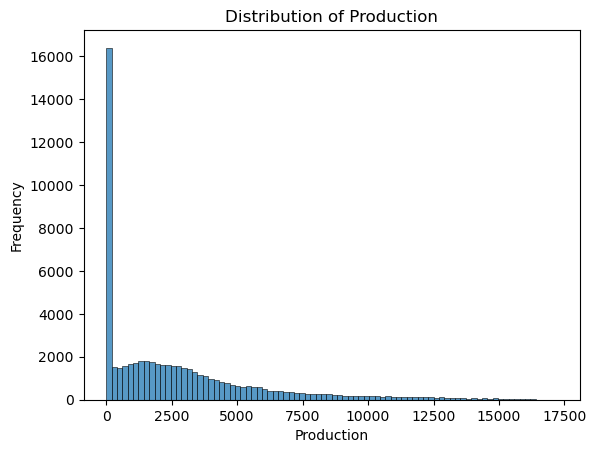

In [24]:
sns.histplot(df['Production'], kde=False)
plt.title('Distribution of Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()


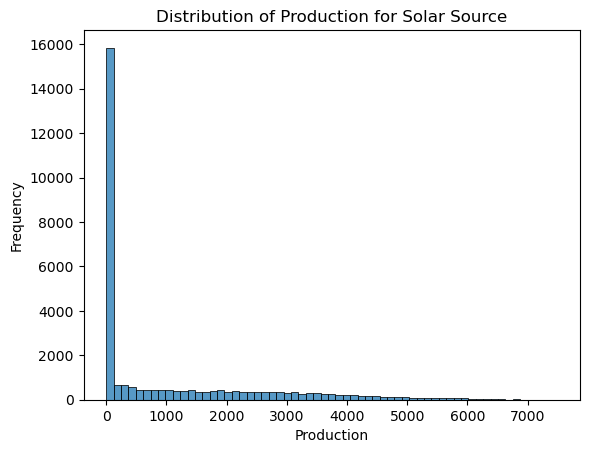

In [25]:
solar_df = df[df["Source"] == "Solar"]
sns.histplot(solar_df["Production"], kde=False)
plt.title('Distribution of Production for Solar Source')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

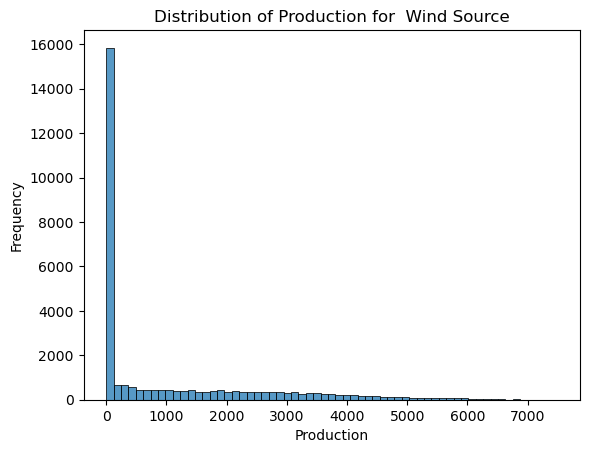

In [26]:
wind_df = df[df["Source"] == "Wind"]
sns.histplot(solar_df["Production"], kde=False)
plt.title('Distribution of Production for  Wind Source')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

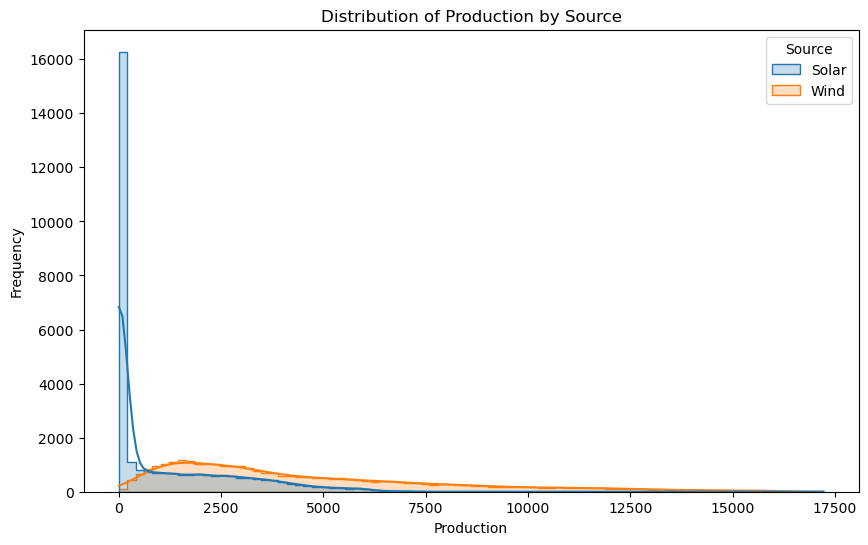

In [27]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Production', hue='Source', kde=True, element='step')
plt.title('Distribution of Production by Source')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.show()

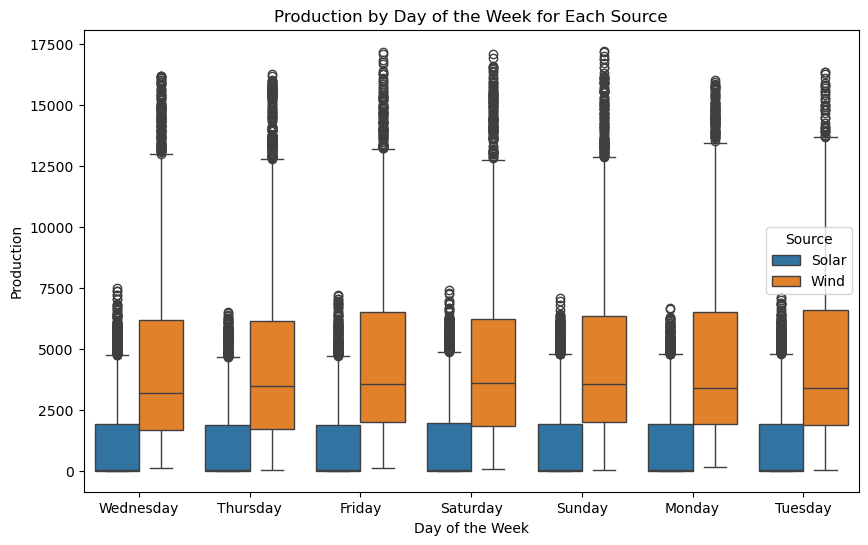

In [28]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='dayName', y='Production', hue='Source', data=df)
plt.title('Production by Day of the Week for Each Source')
plt.xlabel('Day of the Week')
plt.ylabel('Production')
plt.show()


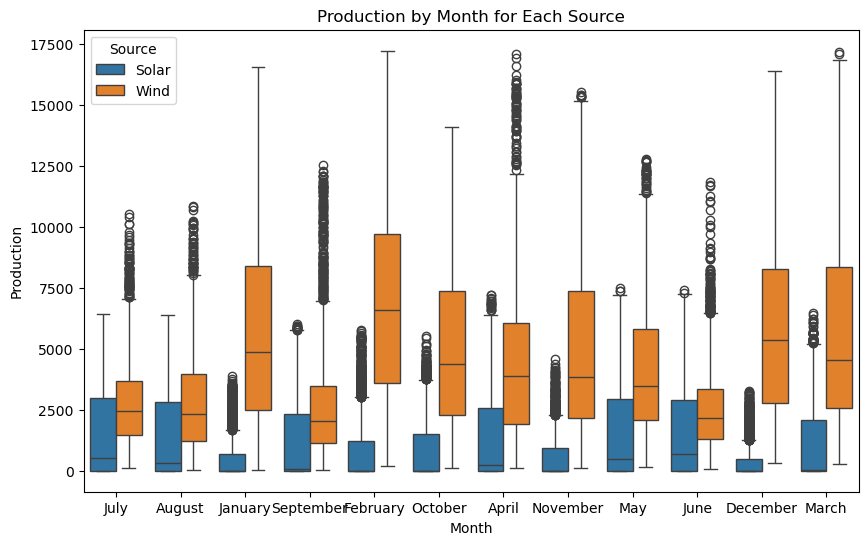

In [29]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='monthName', y='Production', hue='Source', data=df)
plt.title('Production by Month for Each Source')
plt.xlabel('Month')
plt.ylabel('Production')
plt.show()

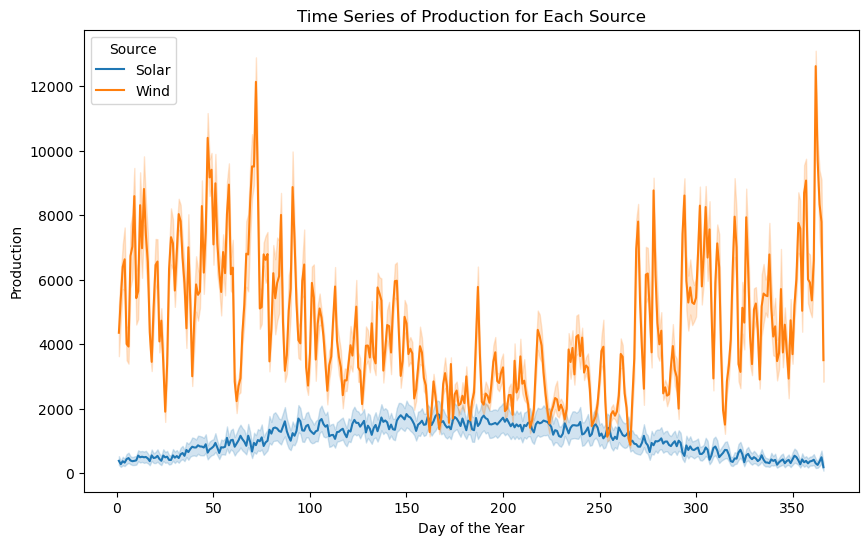

In [30]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='dayOfYear', y='Production', hue='Source', data=df)
plt.title('Time Series of Production for Each Source')
plt.xlabel('Day of the Year')
plt.ylabel('Production')
plt.show()

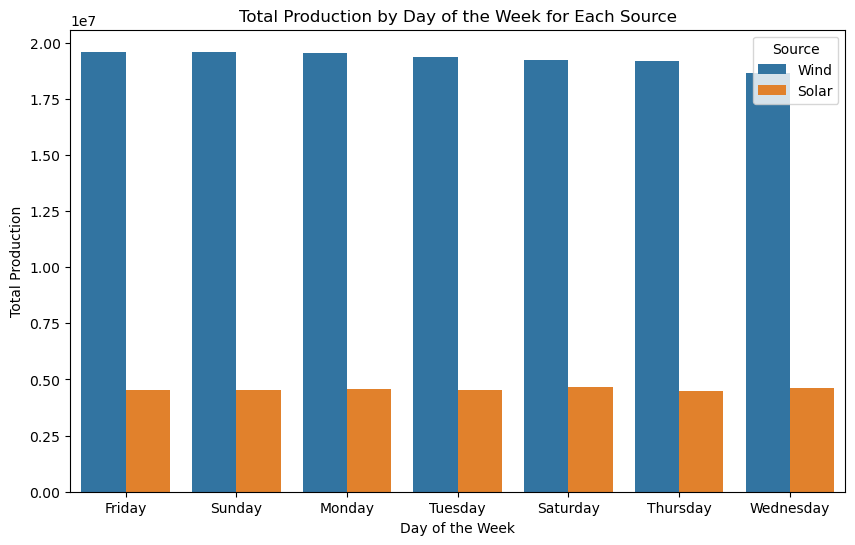

In [31]:
weekday_summary = df.groupby(['dayName', 'Source'])['Production'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='dayName', y='Production', hue='Source', data=weekday_summary)
plt.title('Total Production by Day of the Week for Each Source')
plt.xlabel('Day of the Week')
plt.ylabel('Total Production')
plt.show()


In [32]:
df.to_csv('cleaned.csv')


In [33]:
solar_df.to_csv('solarcleaned.csv')

In [ ]:
wind_df.to_csv('windcleaned.csv')